# Lab 6 & 7b: SVM Binary Classification
#### Name:- Sruthi Nayagi 
#### Reg.no:- 19BAI1037 
#### Subject:- Computer Vision in Healthcare Application (CSE4038) 
#### Faculty-In-Charge:- Dr.BALASUNDARAM A
#### Lab Slot:- L27+L28 
#### Date of Submission:- 03/3/2022
#### Dataset Used:- chest_xray

## Importing neccessary libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,Dense,MaxPool2D,Flatten
from tensorflow.keras.regularizers import l2

## Mounting the drive

In [2]:
train_dir = r"C:\Users\LENOVO\Desktop\Datasets\chest_xray\train/"
test_dir = r"C:\Users\LENOVO\Desktop\Datasets\chest_xray\test/"
train_datagen = ImageDataGenerator(rescale=(1/255.),shear_range = 0.2,zoom_range=0.2,
                                   horizontal_flip=True)
training_set = train_datagen.flow_from_directory(directory = train_dir,target_size=(64,64),
                                                batch_size=32,
                                                class_mode = "binary")
test_datagen = ImageDataGenerator(rescale=(1/255.))
test_set = test_datagen.flow_from_directory(directory = test_dir,target_size=(64,64),
                                                batch_size=32,
                                                class_mode = "binary")

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


# Building the Model

In [3]:
model = Sequential()
model.add(Conv2D(filters = 32, padding = "same",activation = "relu",kernel_size=3, strides = 2,input_shape=(64,64,3)))
model.add(MaxPool2D(pool_size=(2,2),strides = 2))

model.add(Conv2D(filters = 32, padding = "same",activation = "relu",kernel_size=3))
model.add(MaxPool2D(pool_size=(2,2),strides = 2))

model.add(Flatten())
model.add(Dense(128,activation="relu"))

#Output layer
model.add(Dense(1,kernel_regularizer=l2(0.01),activation = "linear"))

In [4]:
model.compile(optimizer = 'adam', loss = "hinge", metrics = ['accuracy'])

## Training the model

In [5]:
history = model.fit(x = training_set, validation_data = test_set, epochs=5)

Epoch 1/5
163/163 [==============================] - 159s 975ms/step - loss: 0.3840 - accuracy: 0.8326 - val_loss: 0.5693 - val_accuracy: 0.8077
Epoch 2/5
163/163 [==============================] - 161s 987ms/step - loss: 0.2350 - accuracy: 0.8988 - val_loss: 0.4547 - val_accuracy: 0.8622
Epoch 3/5
163/163 [==============================] - 168s 1s/step - loss: 0.2223 - accuracy: 0.9038 - val_loss: 0.3613 - val_accuracy: 0.8942
Epoch 4/5
163/163 [==============================] - 164s 1s/step - loss: 0.1949 - accuracy: 0.9155 - val_loss: 0.3801 - val_accuracy: 0.8878
Epoch 5/5
163/163 [==============================] - 152s 932ms/step - loss: 0.1887 - accuracy: 0.9178 - val_loss: 0.3716 - val_accuracy: 0.8766


# Evaluate the model

In [6]:
import matplotlib.pyplot as plt

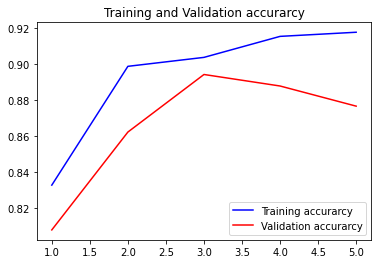

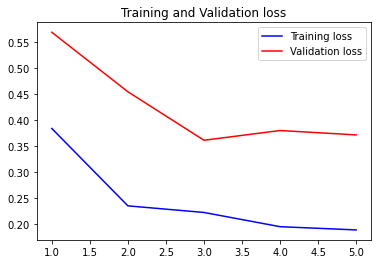

In [7]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()

# Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

## Conclusion:
We can see from the above plot that the validation accurarcy increases as the training accuracy increases and the validation accurarcy decreases as the training accuracy decreases. **The overall accuracy of the model is 88%.**